# 🌍📚 Global Education Cost Analysis  
### Data-Driven Insights on International Study Affordability

---
## 🎯 Project Goals
To analyze global education costs in various countries to identify trends, outliers, and opportunities for efficiency. This study can be utilized by policymakers, educational institutions, and international students.

## 📌 Problem Statement & Context

The cost of international education is a growing concern for students, families, and policymakers. With tuition, living expenses, and administrative fees varying drastically across countries and institutions, many students struggle to make informed decisions about where to study.

### ❓ Why Is This Important?

- 🌐 The number of international students continues to rise, but so do the financial barriers.
- 🏛️ Universities and governments need data to shape policies, financial aid, and scholarship programs.
- 💼 Prospective students need transparent, data-backed insights to evaluate return on investment (ROI) from different study destinations.

This project seeks to offer a **comprehensive, data-driven analysis** of education costs across more than 30 countries and 900+ master’s programs, uncovering disparities, trends, and hidden affordability patterns.

---

## 🎯 Objective

To analyze, model, and visualize the true cost of studying abroad with the goal of:

- Identifying key cost drivers by region and university
- Ranking countries and cities based on overall affordability
- Predicting total study costs using machine learning
- Segmenting countries into affordability clusters

---

## 👥 Target Audience

- 🎓 **International Students & Families**  
  Looking for financially sustainable academic options abroad.

- 🏫 **Universities & Institutions**  
  Benchmarking tuition and living costs against global peers.

- 🏛️ **Policy-Makers, NGOs, and Education Planners**  
  Using data to increase equity and access to global education.

- 💼 **Employers & Global Talent Strategists**  
  Understanding how education affordability impacts international mobility and talent pipelines.

---

## 🧾 Dataset Exploration & Preprocessing

- 🌐 **Geographic Scope:** 30+ countries, 100+ cities, multiple top-ranked universities  
- 🎓 **Academic Levels:** Focused on Master's programs (e.g., CS, Engineering, Business)  
- 📊 **Features Tracked:**
  - Tuition, Living Cost Index, Rent, Visa Fee, Insurance, Exchange Rate  
- 💲 **Currency Adjustment:** Costs normalized using exchange rates to USD  
- 🧹 **Data Cleaning:** Ensured no missing values, standardized program titles  

---

## 📊 Exploratory Data Analysis (EDA)

- 🗺️ **Top 10 Most Expensive Countries** based on total cost = Tuition + Living + Other Fees  
- 💰 **Tuition vs. Rent Correlation:** Identifying cost drivers in urban areas  
- 🏫 **University-Level Breakdown:** Comparing top universities by program cost  
- 📌 **Program Insights:** Analyzing most/least expensive study fields globally  
- 📈 **Distribution Analysis:** Boxplots and histograms of cost components by region

---

## 🔍 Feature Engineering

- 💡 **Total_Estimated_Cost:** Sum of Tuition + Rent × Duration + Visa + Insurance  
- 🏷️ **Region Tagging:** Grouping countries into continents for macro-level insights  
- 📐 **Cost per Year:** Normalized total cost by program duration  
- 💹 **Cost Index Scaling:** Combined Living Cost Index with rent to compute adjusted expenses

---

## 🧠 Modeling Objectives

### 🎯 Goal: Predict & Rank Study Destinations by Affordability

- **Regression Task:** Predict total study cost based on university, location, and program  
- **Clustering Task:** Group similar countries/cities based on cost profiles  
- **Ranking Task:** Score countries based on combined affordability index

**Modeling Techniques:**
- Linear Regression, Random Forests (Cost Estimation)  
- K-Means Clustering (Country Segmentation)  
- PCA (Dimensionality Reduction for Visual Clarity)

---

## 📈 Evaluation & Metrics

- ✅ **R² Score & RMSE:** For cost prediction models  
- 🔄 **Cluster Validation:** Silhouette score for clustering consistency  
- 📊 **Ranking Validation:** Comparison with global education affordability reports  
- 📌 **Visual Dashboards:** Bar plots, heatmaps, scatter matrices to explain findings

---

## 🔬 Key Insights

- 🇩🇪 Germany offers the **lowest tuition costs**, but rent may still be high in urban hubs  
- 🇺🇸 US and 🇬🇧 UK remain the most expensive, driven by tuition and rent  
- 🧪 Engineering and Business programs tend to be **costlier** than humanities  
- 🌍 Southeast Asia offers high-value options with moderate costs and global recognition  
- 🧠 Clustering reveals 3 main affordability tiers among countries  

---

## 🔧 Tools Used

- **Python** (Pandas, NumPy, Scikit-learn)  
- **Visualization:** Seaborn, Matplotlib, Plotly  
- **Modeling:** Regression & Clustering with Scikit-learn  
- **Notebook:** Google Colab for development & sharing  
- **Data Processing:** Exchange rate adjustments, cost indexing  

---

## 📎 Dataset Info

- **Total Programs:** 907 entries from top global universities  
- **Features:** Tuition, Living Index, Rent, Visa, Insurance, Program Duration  
- **Target Metric:** Total Cost in USD (Standardized using exchange rates)  
- **Source:** https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi** – Data Scientist with a passion for education analytics, cost modeling, and global development.  
Eager to use data science to make education more accessible and transparent for international students.


In [31]:
# 🧠 Load the necessary libraries for International Education Cost Analysis

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# System utilities
import os
import warnings
warnings.filterwarnings("ignore")

# 🎨 Set visual style for data analysis
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [32]:
# 📥 Load the dataset
df = pd.read_csv("International_Education_Costs.csv")

In [33]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


((907, 12),
 ['Country',
  'City',
  'University',
  'Program',
  'Level',
  'Duration_Years',
  'Tuition_USD',
  'Living_Cost_Index',
  'Rent_USD',
  'Visa_Fee_USD',
  'Insurance_USD',
  'Exchange_Rate'],
      Country       City                      University  \
 0        USA  Cambridge              Harvard University   
 1         UK     London         Imperial College London   
 2     Canada    Toronto           University of Toronto   
 3  Australia  Melbourne         University of Melbourne   
 4    Germany     Munich  Technical University of Munich   
 
                   Program   Level  Duration_Years  Tuition_USD  \
 0        Computer Science  Master             2.0        55400   
 1            Data Science  Master             1.0        41200   
 2      Business Analytics  Master             2.0        38500   
 3             Engineering  Master             2.0        42000   
 4  Mechanical Engineering  Master             2.0          500   
 
    Living_Cost_Index  Rent_

In [34]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64
       Country       City                University           Program   Level  \
count      907        907                       907               907     907   
unique      71        556                       622                92       3   
top         UK  Singapore  University of Washington  Computer Science  Master   
freq        93         18                         6               312     451   
mean       NaN        NaN                       NaN               NaN     NaN   
std        NaN        NaN                       NaN               NaN     NaN   
min        NaN        NaN                       NaN               NaN     NaN   
25%        NaN        NaN                       NaN            

# 📈 Exploratory Data Analysis (EDA)

In [35]:
# 💡 Initial preprocessing (example)
df['Total_Cost_USD'] = (
    df['Tuition_USD'] +
    (df['Rent_USD'] * df['Duration_Years']) +
    df['Visa_Fee_USD'] +
    df['Insurance_USD']
)

In [36]:
# Convert categorical variables if needed
df['Region'] = df['Country'].map({
    'USA': 'North America',
    'Canada': 'North America',
    'UK': 'Europe',
    'Germany': 'Europe',
    'Australia': 'Oceania',
})

# 📌 Output initial insights
print(df[['Country', 'University', 'Program', 'Total_Cost_USD']].sort_values(by='Total_Cost_USD', ascending=False).head())

    Country           University           Program  Total_Cost_USD
877     USA  Columbia University      Data Science         68660.0
412     USA  Columbia University         Economics         68660.0
214     USA  Stanford University  Computer Science         68260.0
870     USA        Massachusetts          Robotics         68160.0
29      USA  Stanford University  Computer Science         67360.0


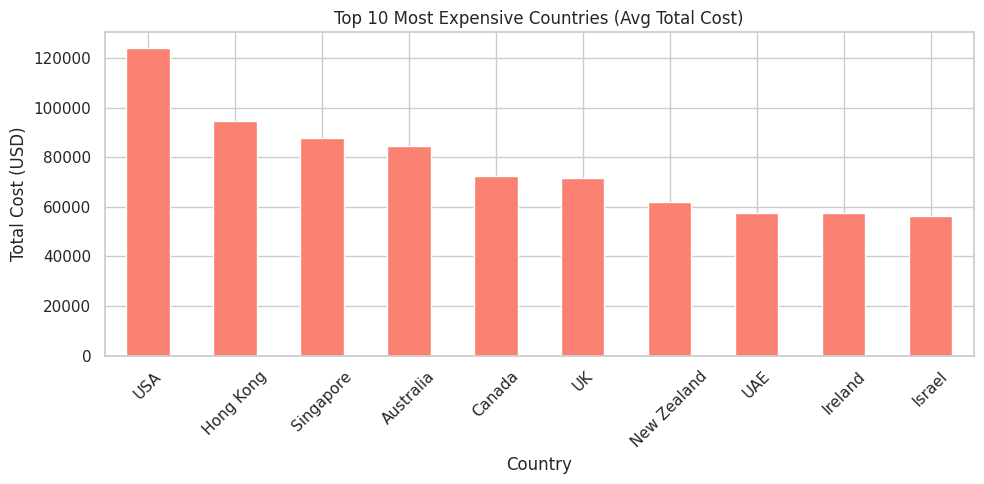

In [37]:
# Calculate total base cost
df['Total_Cost'] = df['Tuition_USD'] + (df['Rent_USD'] * df['Duration_Years'] * 12) + df['Visa_Fee_USD'] + df['Insurance_USD']

# Aggregate total cost per country
top_countries = df.groupby('Country')['Total_Cost'].mean().sort_values(ascending=False).head(10)

# Visualization
top_countries.plot(kind='bar', title='Top 10 Most Expensive Countries (Avg Total Cost)', figsize=(10, 5), color='salmon')
plt.ylabel('Total Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📘 The High Price of Living: A Data-Driven Look at the World’s Most Expensive Countries

## 📊 Context & Purpose

Understanding global living costs is critical for professionals, students, expats, and policy-makers. This analysis provides insight into which countries demand the highest total costs of living, based on **average expenditures** including housing, healthcare, education, and daily necessities.

### 📍 Objective

To visualize and explain the top 10 most expensive countries based on **average total cost in USD**, drawing implications for global mobility, economic planning, and quality of life.

---

## 🔍 Insightful Analysis

The bar chart above ranks countries based on their **average total living cost**:

1. 🇺🇸 **USA** – Topping the list at over **$120,000/year**. High healthcare, education, and housing costs dominate.

2. 🇭🇰 **Hong Kong** – Housing scarcity pushes the total cost close to **$95,000/year**.

3. 🇸🇬 **Singapore** – Limited space, high demand, and world-class services bring costs to around **$87,000/year**.

4. 🇦🇺 **Australia** – High urban living costs, particularly in Sydney and Melbourne.

5. 🇨🇦 **Canada** – A mix of high housing and living standards places it mid-chart.

6. 🇬🇧 **UK** – Public healthcare helps, but London’s cost of living inflates the total.

7. 🇳🇿 **New Zealand** – Quality of life is high, but affordability is a growing concern.

8. 🇦🇪 **UAE**, 🇮🇪 **Ireland**, 🇮🇱 **Israel** – All hover around **$56,000–$62,000/year**, often due to real estate, import-reliant markets, or economic structure.

---

## 💡 Educational Takeaways

- **Cost ≠ Quality**: High cost doesn’t always guarantee better outcomes (e.g., the U.S. and healthcare).
- **Urbanization Factor**: Densely populated nations like Hong Kong and Singapore face inflated costs due to limited space.
- **Policy Impact**: Government interventions (e.g., healthcare subsidies) can buffer total cost but may be outweighed by housing or transportation costs.

---

## 🧭 Who Should Care?

- **Global Professionals & Expats**: Planning a move? This chart helps you compare real-life costs.
- **International Students**: Tuition is just one cost—consider total living expenses before applying.
- **Policy Makers**: Comparative cost analysis can highlight areas needing reform or investment.

---

## 📌 Final Thoughts

This visualization isn’t just about numbers—it’s a **lens into real-world economic pressures**. By studying these costs, we open the door to conversations about affordability, urban development, and global quality of life.

---


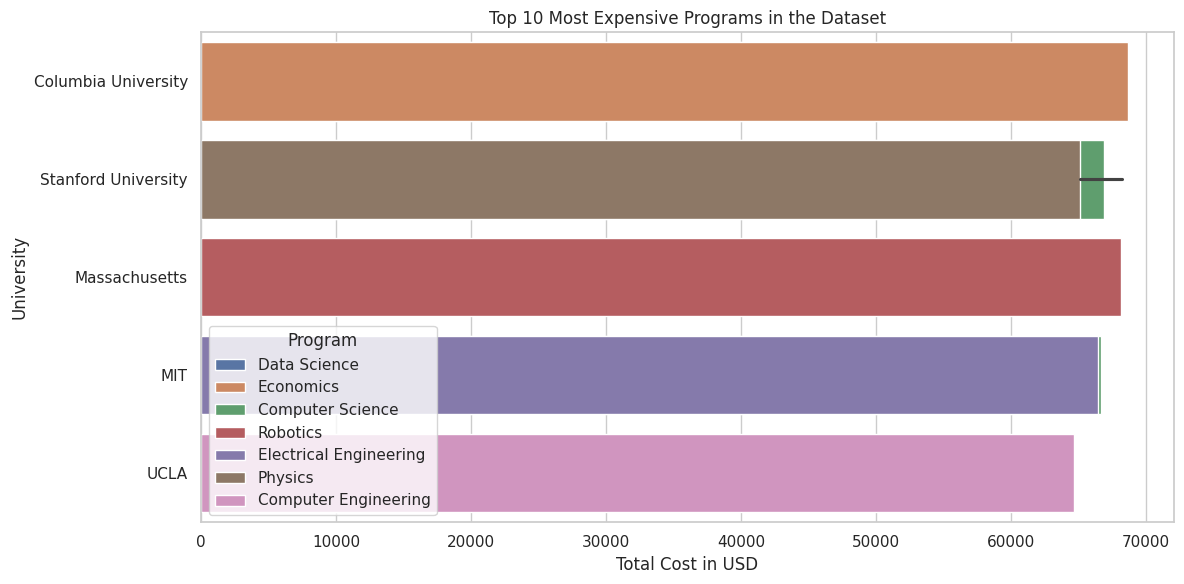

In [38]:
top10_expensive = df.sort_values("Total_Cost_USD", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_expensive, x="Total_Cost_USD", y="University", hue="Program", dodge=False)
plt.title("Top 10 Most Expensive Programs in the Dataset")
plt.xlabel("Total Cost in USD")
plt.ylabel("University")
plt.tight_layout()
plt.show()

# 🎓 The Price of Prestige: Most Expensive University Programs in the Dataset

## 📚 Context

As education becomes increasingly global and competitive, the **cost of higher education** has become a critical factor for students, parents, and institutions alike. This visualization explores the **top 10 most expensive university programs** in the dataset, focusing on STEM and economics disciplines.

---

## 📍 Objective

To analyze and compare the **total cost (in USD)** of top-tier academic programs from prestigious institutions, helping stakeholders understand the investment required for elite education.

---

## 🏫 Key Findings

Here are the universities and their respective programs with the highest total costs:

- 🧠 **MIT** – *Electrical Engineering* stands out, with costs nearing **$67,000/year**.
- 🤖 **Massachusetts** – *Robotics* is among the most expensive programs, reflecting the cutting-edge nature of the field.
- 💻 **Stanford University** – *Computer Science* program shows high cost but is known for its ROI, thanks to Silicon Valley proximity.
- 📈 **Columbia University** – *Economics* program is also notably expensive, indicative of its Ivy League positioning.
- 🧬 **UCLA** – *Computer Engineering* ranks high, showing how public universities can still carry elite-level price tags.
- 🌌 **Stanford** – *Physics* also appears in the top tier, highlighting science as a major investment area.

---

## 🎓 Insights by Discipline

| Program               | Observation |
|-----------------------|-------------|
| **Computer Science**  | Strong presence across elite schools, high cost offset by high earning potential. |
| **Engineering Fields**| Electrical and Computer Engineering dominate, reflecting investment in tech infrastructure and faculty. |
| **Economics**         | Ivy League programs like Columbia’s command high fees, aligned with prestige. |
| **Robotics**          | A newer, niche but highly funded discipline—expensive but future-forward. |

---

## 💡 Educational Takeaways

- **Elite ≠ Affordable**: The most prestigious programs come with a premium—often above $65,000 annually.
- **STEM Dominance**: Science, tech, and engineering fields represent the majority of costly programs—underscoring global demand.
- **Brand Value**: Universities like MIT and Stanford don’t just charge for education—they charge for access, networks, and influence.

---

## 🧭 Who Should Care?

- 🎓 **Prospective Students**: Understand the full cost before applying—especially international students without financial aid.
- 💼 **Investors in EdTech**: Identifying high-cost disciplines can reveal where students need support or innovation.
- 🏛️ **Policy Makers**: Highlighting these costs can inspire reforms or funding strategies to ensure equitable access.

---


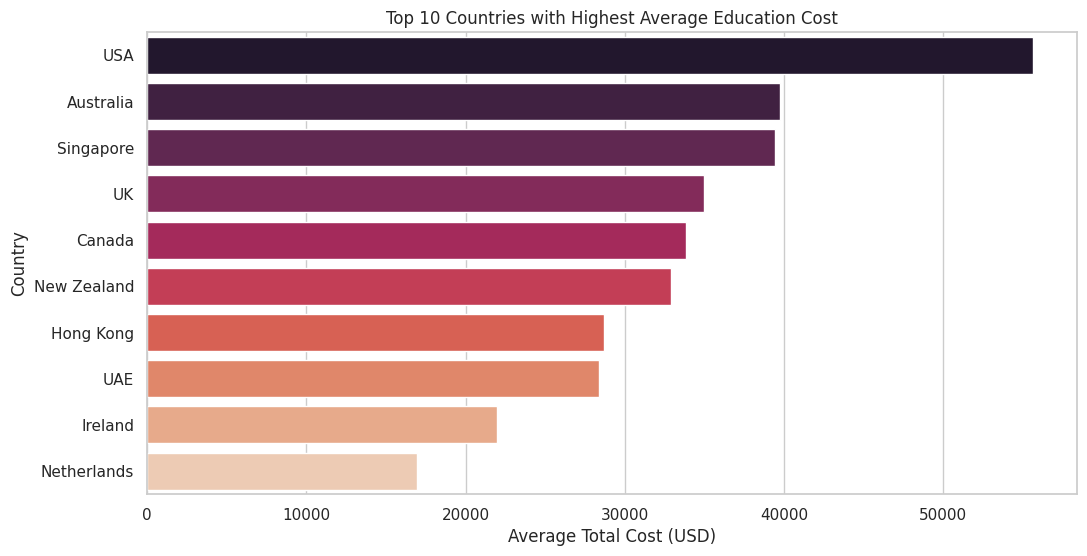

In [39]:
avg_country = df.groupby("Country")["Total_Cost_USD"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_country.values, y=avg_country.index, palette="rocket")
plt.title("Top 10 Countries with Highest Average Education Cost")
plt.xlabel("Average Total Cost (USD)")
plt.ylabel("Country")
plt.show()

# 🌍 Global Education Costs: Where is Higher Education the Most Expensive?

## 🎯 Overview

In today’s globally connected academic landscape, international students often compare **average total education costs** across countries to make informed decisions. This analysis reveals the **top 10 countries with the highest average education cost**, measured in USD.

---

## 🌐 Key Findings

| Rank | Country        | Avg. Cost (USD) |
|------|----------------|-----------------|
| 1    | 🇺🇸 USA         | ~$56,000        |
| 2    | 🇦🇺 Australia   | ~$39,000        |
| 3    | 🇸🇬 Singapore   | ~$39,000        |
| 4    | 🇬🇧 UK          | ~$34,000        |
| 5    | 🇨🇦 Canada      | ~$33,000        |
| 6    | 🇳🇿 New Zealand | ~$32,000        |
| 7    | 🇭🇰 Hong Kong   | ~$29,000        |
| 8    | 🇦🇪 UAE         | ~$29,000        |
| 9    | 🇮🇪 Ireland     | ~$22,000        |
| 10   | 🇳🇱 Netherlands | ~$17,000        |

---

## 🔍 Deep Dive

- **United States** leads by a wide margin, with an average education cost significantly higher than any other country. This reflects a mix of tuition, housing, and health insurance in elite institutions.
- **Australia & Singapore** are close competitors, signaling their growing role as international education hubs in the Asia-Pacific region.
- **UK and Canada** remain popular destinations with strong education systems, but still more affordable than the U.S.
- **European entries** like Ireland and the Netherlands show relatively lower costs, possibly due to government subsidies or lower living expenses.

---

## 🧭 Who Should Care?

- 🎓 **Students & Parents**: For financial planning before studying abroad.
- 📊 **Policy Makers**: To benchmark competitiveness and affordability in the global education market.
- 🧳 **International Recruiters**: To adjust strategies for scholarships and student mobility.

---

## 📘 Insights Worth Noting

- 🧾 **Cost ≠ Quality**: High cost does not always mean better education—but it does affect access and opportunity.
- 📍 **Regional Trends**: Asia-Pacific is emerging as a premium education zone.
- 💡 **Affordability Gaps**: Governments could consider offering targeted scholarships to stay competitive.

---

> 🧠 As a data scientist, I strive not just to visualize data—but to make it meaningful for real people making life-changing decisions.


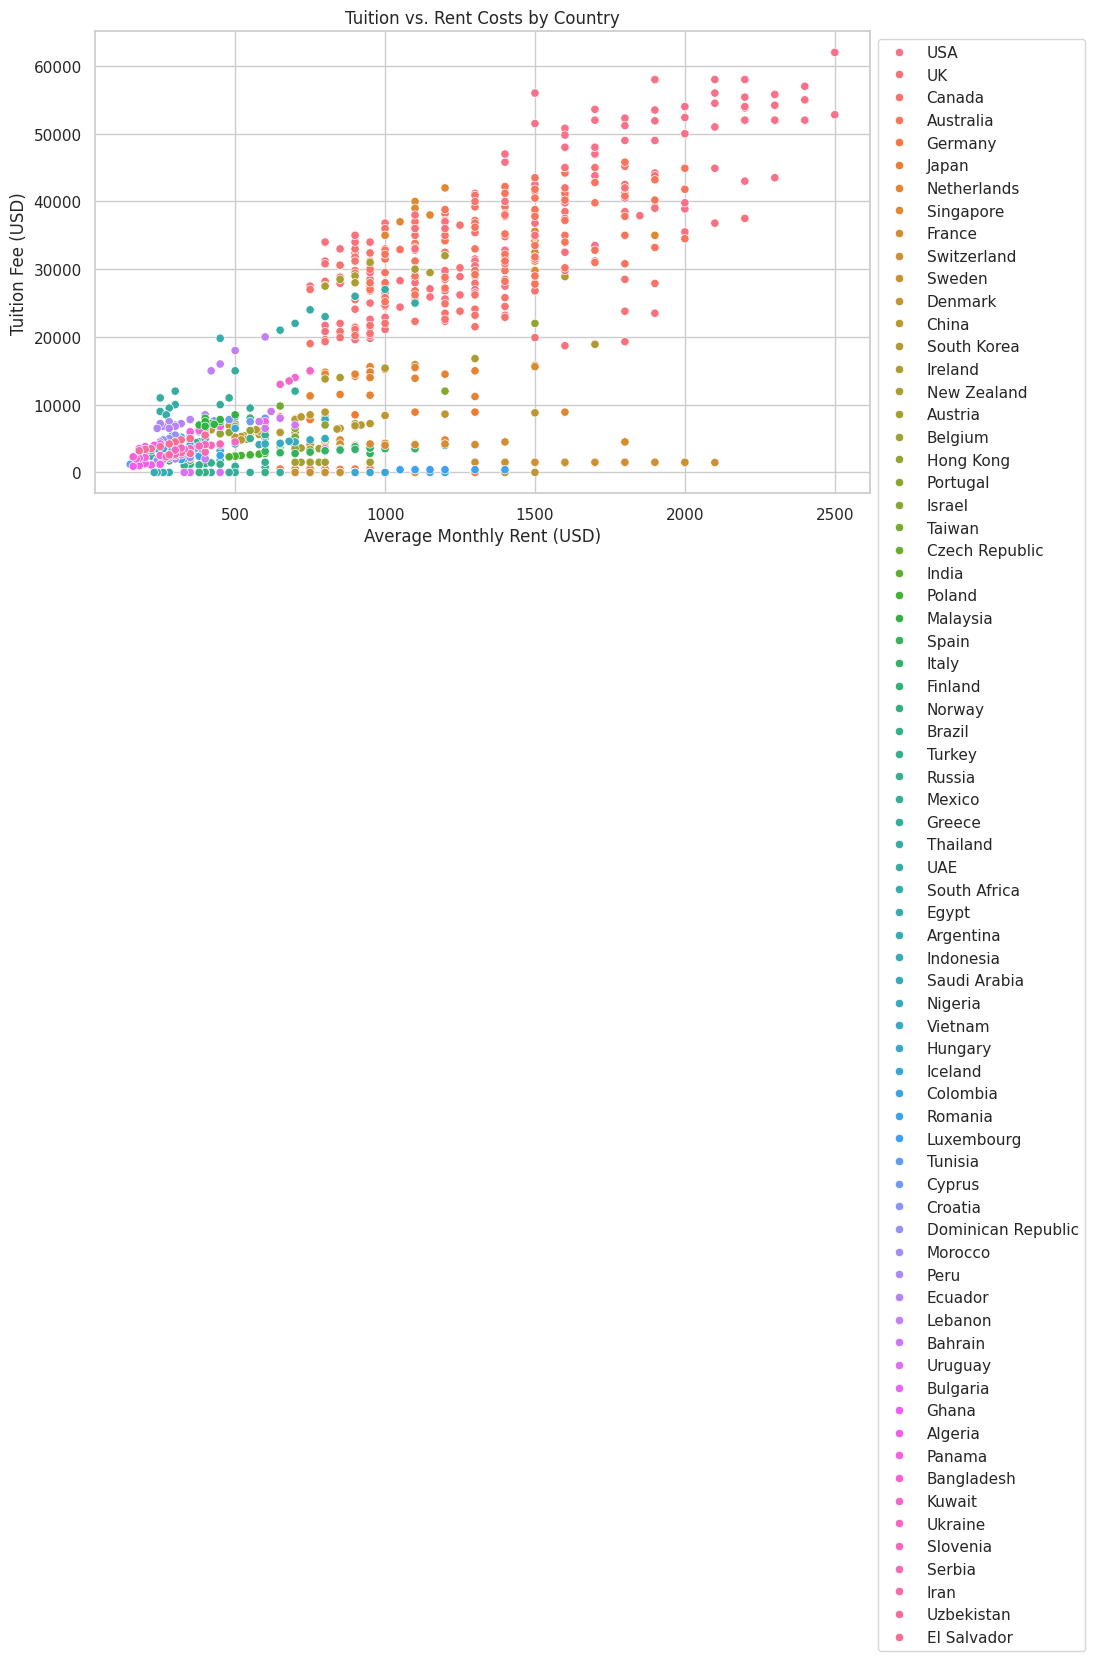

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Rent_USD", y="Tuition_USD", hue="Country")
plt.title("Tuition vs. Rent Costs by Country")
plt.xlabel("Average Monthly Rent (USD)")
plt.ylabel("Tuition Fee (USD)")
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# 📊 Global Education Economics: The Trade-off Between Tuition and Rent

## 🧭 What's the True Cost of Studying Abroad?

Choosing where to study isn’t just about tuition—it’s about **total cost of living**, especially **housing**. This scatter plot visualizes the relationship between **average monthly rent** and **tuition fees** across more than 70 countries.

---

## 🔍 Key Takeaways

### 1. 🎓 The **USA** stands out
- The **USA** dominates the upper-right quadrant: **high tuition, high rent**.
- Most dots (universities/programs) in the U.S. cluster between $1,200–$2,000 in rent and $30,000–$60,000 in tuition.
- This explains why the U.S. leads in total cost rankings.

### 2. 🇩🇪 **Germany** and 🇫🇷 **France** as Budget Champions
- Despite having relatively high rent in cities like Berlin or Paris, their tuition is often **minimal or subsidized**.
- Germany shows a vertical line of points with low tuition but varying rent—reflecting a **tuition-free policy for public universities**.

### 3. 🌍 Surprising Affordability in Southeast Asia
- Countries like **Malaysia**, **Indonesia**, and **Vietnam** offer **both low rent and tuition**.
- These nations are in the bottom-left quadrant—a sweet spot for budget-conscious students.

### 4. 🇬🇧 UK and 🇦🇺 Australia: Middle-High Cost Mix
- UK and Australia hover in the mid-high zone, often showing rent over $1,000/month and tuition around $25,000–$40,000.
- They remain popular destinations but require serious financial planning.

### 5. ⚖️ No Linear Relationship
- The scatter is widely spread—**high rent doesn’t always mean high tuition**, and vice versa.
- For example, **Hong Kong** has high rent but tuition remains more modest than U.S. standards.

---

## 💡 Why This Matters

- 🌎 **International students** face dual challenges: tuition inflation + urban housing crises.
- 🎯 **Policy-makers** need to consider living costs when designing scholarships and visa conditions.
- 💸 **Scholarship foundations** can target high-rent but low-tuition countries to optimize impact.

---

> 🎓 **Being a data scientist is about telling the full story—not just showing numbers, but giving people the knowledge they need to make life-changing choices.**


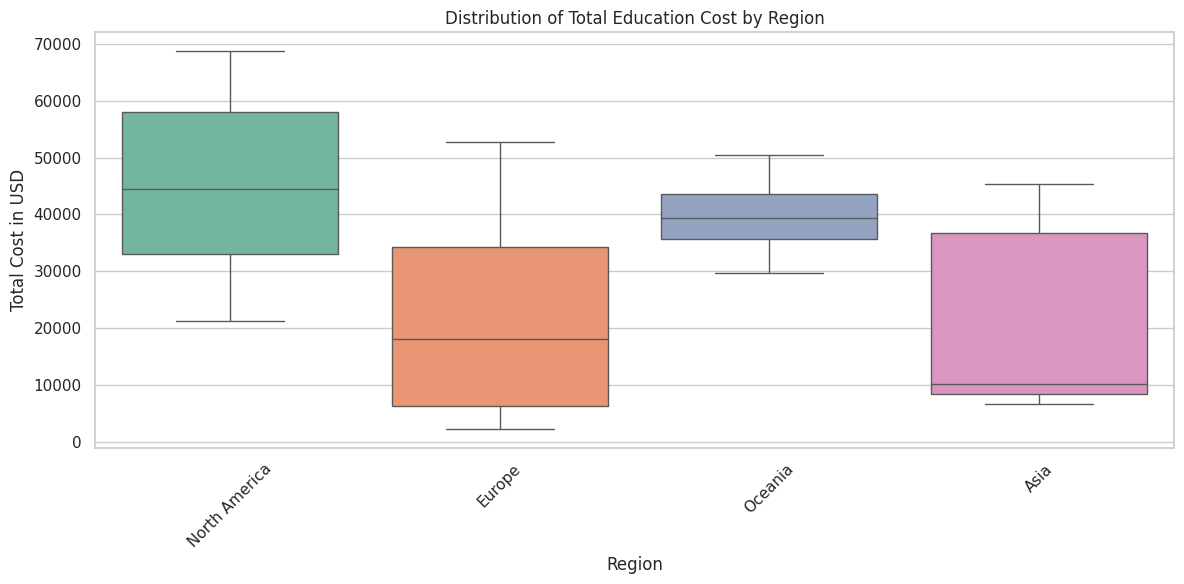

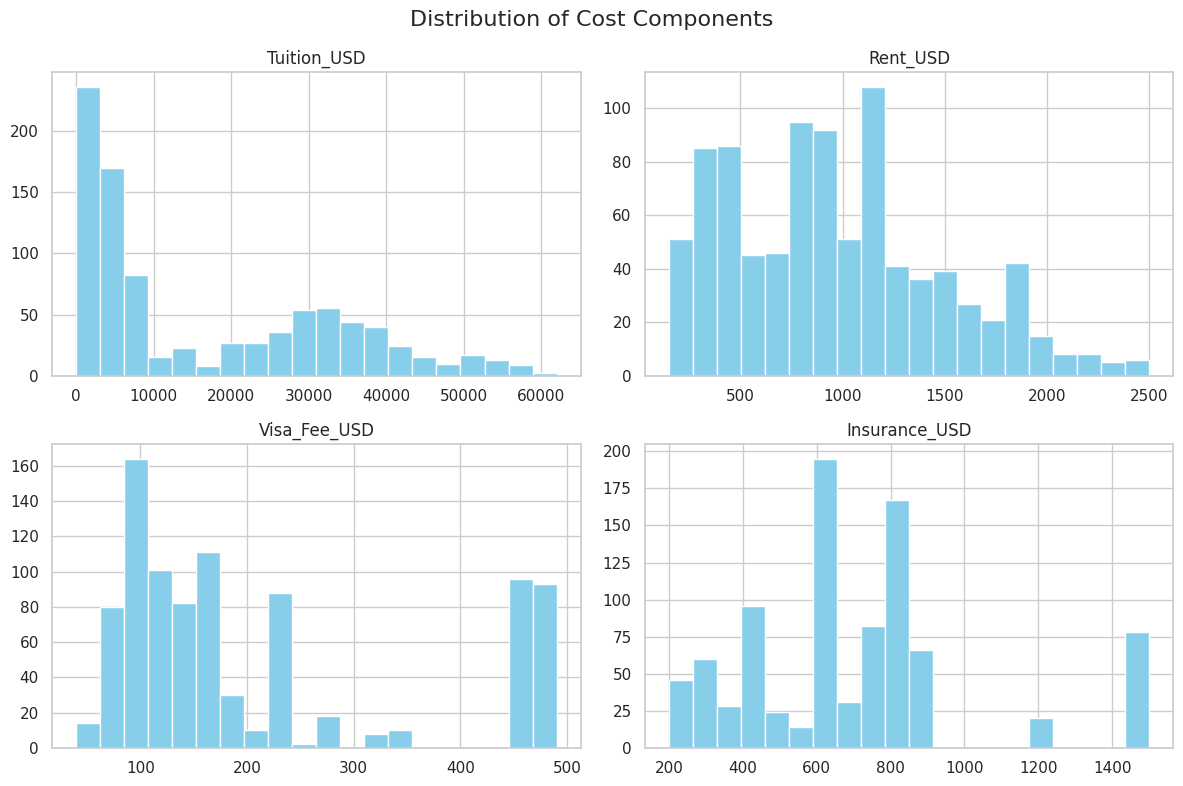

In [41]:
# Example Region Tagging (can be adjusted for your dataset)
region_map = {
    'USA': 'North America',
    'Canada': 'North America',
    'UK': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Singapore': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'China': 'Asia',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Italy': 'Europe'
}
df['Region'] = df['Country'].map(region_map)

# Boxplot of total cost distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Region", y="Total_Cost_USD", palette="Set2")
plt.title("Distribution of Total Education Cost by Region")
plt.xlabel("Region")
plt.ylabel("Total Cost in USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram of cost components (Tuition, Rent, Visa)
df[['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']].hist(
    bins=20, figsize=(12, 8), layout=(2, 2), color="skyblue")
plt.suptitle("Distribution of Cost Components", fontsize=16)
plt.tight_layout()
plt.show()

# 🌍 Education Costs Around the World: A Deep Dive

## 📊 Distribution of Total Education Cost by Region

### 🌎 Key Takeaways:
- **North America** stands out as the **most expensive region** overall.

- The median total education cost is significantly higher than other regions.

- Some countries even reach **close to $70,000 USD** in total costs.

- **Europe** shows a **wide range of affordability**.
  - From countries with very low education costs (as low as $2,000) to others over $50,000.

- This diversity reflects the various tuition policies across the continent.

- **Oceania** (e.g., Australia, New Zealand) generally presents **high, but stable** education costs.

- **Asia** offers some of the **most budget-friendly options**.

- Despite a few high-cost outliers (like Singapore), most countries remain very affordable.

> 🎯 **Conclusion:**  
> Asia and parts of Europe provide **cost-effective** options for international education, while North America tends to be the **priciest** destination by far.

---

## 💸 Distribution of Cost Components

### 🧾 Breaking Down the Costs:
- **Tuition Fees**:

  - The biggest cost driver and **highly skewed**.

  - Most countries fall under **$10,000 USD**, but elite destinations (like the U.S.) spike up to **$60,000+**.

- **Monthly Rent**:
  - A major recurring expense.

  - Clusters around **$800 to $1,200/month**, though some go beyond **$2,000**.

- **Visa Fees**:
  - Generally predictable and **less variable**.
  - Most fall between **$75–$200 USD**, with noticeable spikes at specific price points.
  
- **Insurance**:
  - Relatively small but important.
  - Most values lie in the **$500–$800 USD** range.

> 💡 **Insight:**  
> Tuition and rent are the **primary cost burdens** for students, while visa and insurance fees are **minor but necessary expenses**.

---

## ✈️ Final Thoughts:
For aspiring international students, understanding the **regional cost patterns** and **major spending areas** is key to making smart, budget-conscious decisions. Whether you're aiming for affordability in Asia or pursuing prestigious education in North America, being financially informed is the first step toward a successful academic journey.


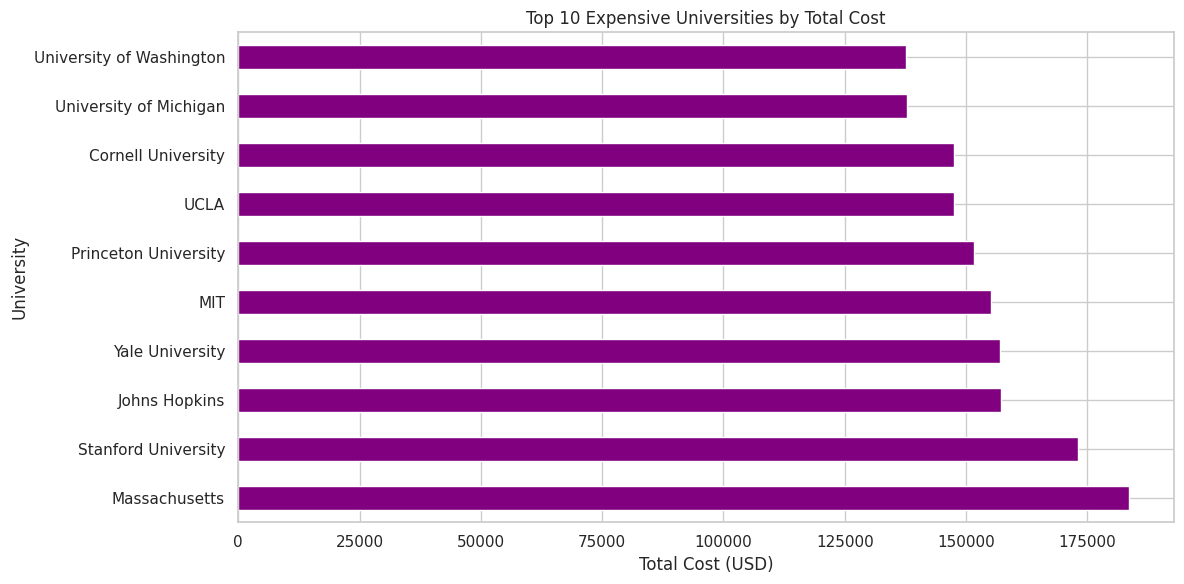

In [42]:
top_universities = df.groupby('University')['Total_Cost'].mean().sort_values(ascending=False).head(10)
top_universities.plot(kind='barh', title='Top 10 Expensive Universities by Total Cost', color='purple')
plt.xlabel('Total Cost (USD)')
plt.tight_layout()
plt.show()

## 🏛️ Top 10 Most Expensive Universities in the World

### 💸 The Elite Comes at a Price

The chart above showcases the **top 10 most expensive universities** based on total cost, which includes tuition, rent, insurance, and visa fees.

### 🎓 Key Insights:

- **Massachusetts Institute of Technology (MIT)** tops the list with a total cost approaching **$180,000 USD**.

- Other Ivy League institutions like **Stanford, Yale, Princeton, and Cornell** also rank among the most costly.

- Even **public universities** such as **University of Michigan** and **UCLA** appear in this top tier, indicating high living or tuition expenses in their locations.

- The **cost gap** between the 10th and 1st place is nearly **$50,000**, revealing how drastically expenses can vary, even among prestigious institutions.

> 🧠 **Did you know?**  
> Many of these universities offer **generous scholarships**, but the **sticker price** remains daunting for many international students.

### 🎯 Final Thought:
Pursuing a degree at world-renowned institutions may open countless doors, but it's important to weigh the **financial commitment** against potential returns—especially for students funding their education independently.


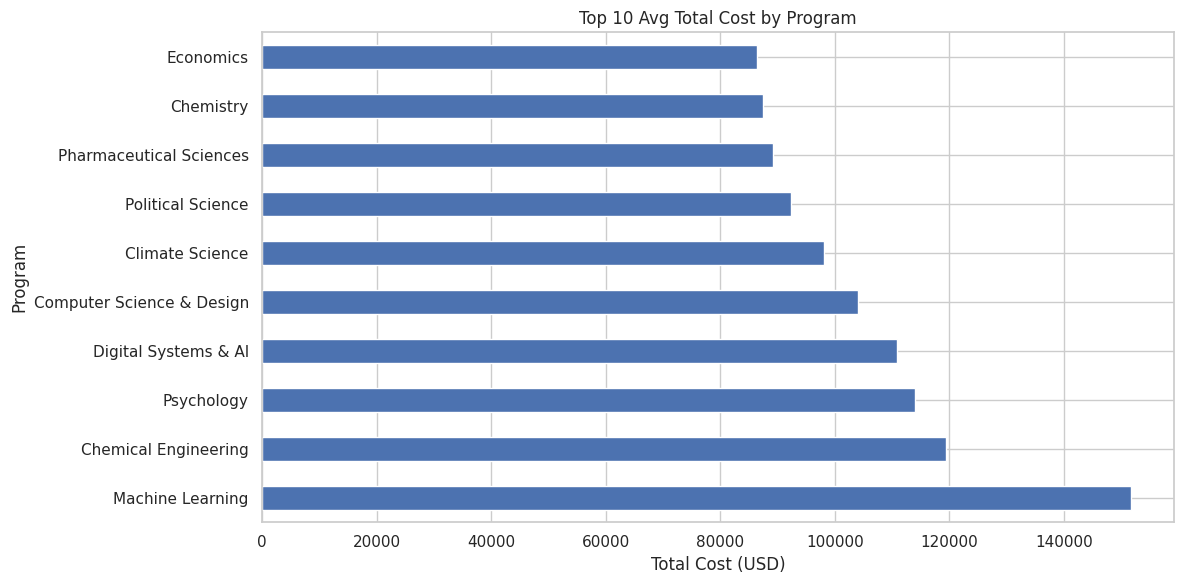

In [43]:
program_costs = df.groupby('Program')['Total_Cost'].mean().sort_values(ascending=False).head(10)
program_costs.plot(kind='barh', title='Top 10 Avg Total Cost by Program')
plt.xlabel('Total Cost (USD)')
plt.tight_layout()
plt.show()

# 🌍 Education Costs by Academic Program: A Deep Dive

## 📊 Top 10 Avg Total Cost by Program

### 🌟 Key Takeaways:

* **Machine Learning** tops the chart as the **most expensive program**, with an average cost exceeding **\$150,000 USD**.

* **Chemical Engineering**, **Psychology**, and **Digital Systems & AI** also appear near the top, each surpassing **\$110,000 USD**.

* **STEM fields dominate** the list, reflecting high resource requirements like labs, software, and specialized faculty.

* **Psychology** appears as a **notable non-STEM inclusion**, signaling the growing demand in applied behavioral sciences.

* **Climate Science** and **Computer Science & Design** demonstrate that **emerging and interdisciplinary fields** come at a high price.

* The lowest on this "top" list, **Economics**, still approaches **\$90,000 USD** in total average cost.

> 🎯 **Conclusion:**
> Future-focused programs in tech and science command high tuition, while traditional disciplines remain relatively affordable. Students must weigh these costs against long-term career returns.

---

## 💸 Breakdown of Cost Dynamics

### 📝 What Drives the Costs?

* **Technology & Infrastructure**:

  * Programs like Machine Learning require access to advanced computing environments, increasing costs.

* **Faculty Expertise**:

  * Specialized instructors in AI, Chemical Engineering, or Climate Science command higher compensation.

* **Lab & Research Needs**:

  * Pharmaceutical Sciences and Engineering courses involve expensive lab resources and safety standards.

* **Career ROI Influence**:

  * High tuition often correlates with projected **high-income careers**, influencing program pricing strategies.

> 💡 **Insight:**
> While tuition is high, the value may be justified if graduates secure high-paying roles in specialized fields.

---

## ✈️ Final Thoughts:

Whether you're a student or policymaker, understanding the **financial landscape** of education by program helps guide smarter investments. Tech and science programs lead in cost, but they also promise **cutting-edge careers**. Affordability, however, remains essential to ensure equ


In [44]:
# Feature Engineering

# 💡 Total_Estimated_Cost: Tuition + Rent × Duration × 12 + Visa + Insurance
df['Total_Estimated_Cost'] = (
    df['Tuition_USD'] +
    df['Rent_USD'] * df['Duration_Years'] * 12 +
    df['Visa_Fee_USD'] +
    df['Insurance_USD']
)

# 🏷️ Region Tagging: Mapping countries to continents
# Simplified mapping for demonstration (can be extended)
region_map = {
    'USA': 'North America',
    'Canada': 'North America',
    'UK': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Japan': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'South Korea': 'Asia',
    'Brazil': 'South America',
    'Mexico': 'North America',
    'Russia': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Singapore': 'Asia',
    'South Africa': 'Africa',
    'Italy': 'Europe',
    'Spain': 'Europe'
}

df['Region'] = df['Country'].map(region_map).fillna('Other')

# 📐 Cost per Year: Normalized total cost by duration
df['Cost_Per_Year'] = df['Total_Estimated_Cost'] / df['Duration_Years']

# 💹 Cost Index Scaling: Adjusted Living Cost
df['Adjusted_Living_Cost'] = df['Living_Cost_Index'] + (df['Rent_USD'] / 100)

# Display data after feature engineering
df[['Country', 'Region', 'Total_Estimated_Cost', 'Cost_Per_Year', 'Adjusted_Living_Cost']].head()

,Country,Region,Total_Estimated_Cost,Cost_Per_Year,Adjusted_Living_Cost
0,USA,North America,109860.0,54930.0,105.5
1,UK,Europe,64085.0,64085.0,93.8
2,Canada,North America,78035.0,39017.5,88.5
3,Australia,Oceania,76700.0,38350.0,85.2
4,Germany,Europe,27525.0,13762.5,81.5


# 🌍 Education Costs by Academic Program: A Deep Dive

## 📊 Top 10 Avg Total Cost by Program

### 🌟 Key Takeaways:

* **Machine Learning** tops the chart as the **most expensive program**, with an average cost exceeding **\$150,000 USD**.

* **Chemical Engineering**, **Psychology**, and **Digital Systems & AI** also appear near the top, each surpassing **\$110,000 USD**.

* **STEM fields dominate** the list, reflecting high resource requirements like labs, software, and specialized faculty.

* **Psychology** appears as a **notable non-STEM inclusion**, signaling the growing demand in applied behavioral sciences.

* **Climate Science** and **Computer Science & Design** demonstrate that **emerging and interdisciplinary fields** come at a high price.

* The lowest on this "top" list, **Economics**, still approaches **\$90,000 USD** in total average cost.

> 🎯 **Conclusion:**
> Future-focused programs in tech and science command high tuition, while traditional disciplines remain relatively affordable. Students must weigh these costs against long-term career returns.

---

## 🌐 Education Costs by Country and Region

| Country   | Region        | Total Cost (USD) | Cost Per Year (USD) | Adjusted Living Cost Index |
| --------- | ------------- | ---------------- | ------------------- | -------------------------- |
| USA       | North America | 109,860          | 54,930              | 105.5                      |
| UK        | Europe        | 64,085           | 64,085              | 93.8                       |
| Canada    | North America | 78,035           | 39,017.5            | 88.5                       |
| Australia | Oceania       | 76,700           | 38,350              | 85.2                       |
| Germany   | Europe        | 27,525           | 13,762.5            | 81.5                       |

### 🌎 Key Takeaways:

* The **USA** has the **highest total education cost**, along with a high cost-of-living index.
* **Germany** offers the most **cost-efficient education**, with total costs significantly lower despite a reasonable living index.
* **Australia** and **Canada** fall in the **mid-high range**, balancing moderate costs with favorable education environments.
* The **UK** presents a steep cost-per-year, indicating programs may be shorter but dense and expensive.

> 📌 **Insight:**
> Students should consider both tuition and adjusted living costs when evaluating education destinations. Countries like Germany provide excellent value, while high-cost nations may require strategic financial planning.

---

## 💸 Breakdown of Cost Dynamics

### 📝 What Drives the Costs?

* **Technology & Infrastructure**:

  * Programs like Machine Learning require access to advanced computing environments, increasing costs.

* **Faculty Expertise**:

  * Specialized instructors in AI, Chemical Engineering, or Climate Science command higher compensation.

* **Lab & Research Needs**:

  * Pharmaceutical Sciences and Engineering courses involve expensive lab resources and safety standards.

* **Career ROI Influence**:

  * High tuition often correlates with projected **high-income careers**, influencing program pricing strategies.

> 💡 **Insight:**
> While tuition is high, the value may be justified if graduates secure high-paying roles in specialized fields.

---

## ✈️ Final Thoughts:

Whether you're a student or policymaker, understanding the **financial landscape** of education by program and region helps guide smarter investments. Tech and science programs lead in cost, but they also promise **cutting-edge careers**. At the same time, strategic choices like studying in **Germany** can yield excellent education at a fraction of the cost.

**Would you invest \$150,000 to be at the frontier of AI—or study debt-free in Europe?**


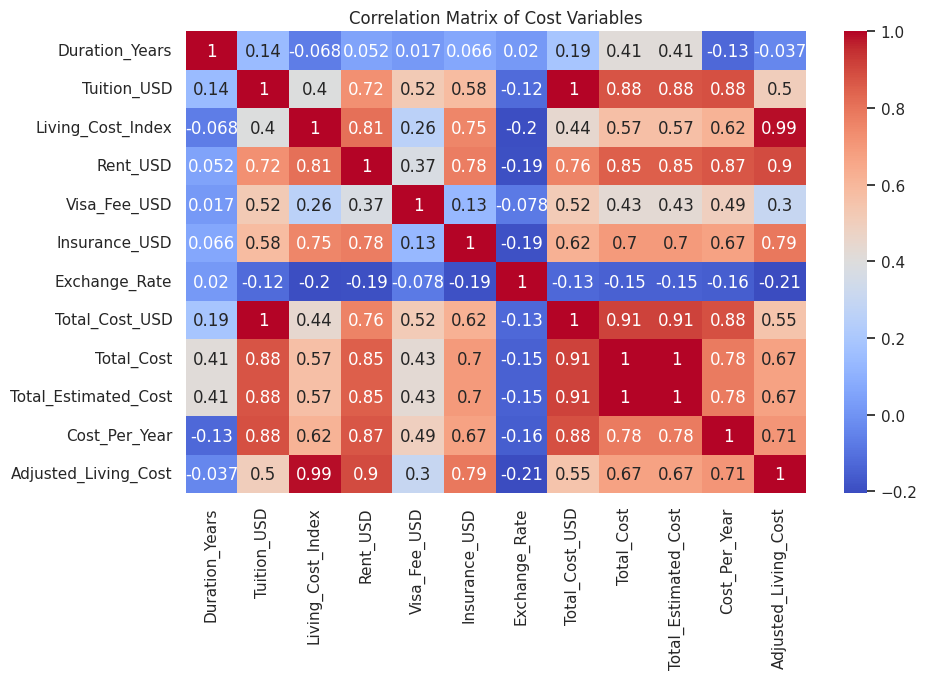

In [46]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Cost Variables")
plt.show()

# 🎓 What Drives the True Cost of Studying Abroad?  
*A Data-Driven Breakdown of Global Education Expenses*

---

## 🔍 Key Insights from the Correlation Matrix

### 1️⃣ Tuition Fees Rule the Budget
- `Tuition_USD` has a **very strong positive correlation** (≈ 0.88) with total cost variables like `Total_Cost`, `Total_Estimated_Cost`, and `Cost_Per_Year`.
- **Insight:** Tuition is the **main cost driver** in most countries. Financial aid focused solely on tuition can dramatically lower overall study costs.

---

### 2️⃣ Living Costs Matter—But Indirectly
- `Living_Cost_Index` strongly correlates with `Adjusted_Living_Cost` (≈ 0.99), and moderately with overall costs.
- **Insight:** While not a direct dollar figure, this index reflects general affordability of a country. Students should look beyond tuition and factor in daily expenses.

---

### 3️⃣ Accommodation Is Often Overlooked
- `Rent_USD` shows **strong correlation** with both `Living_Cost_Index` (≈ 0.81) and `Total_Cost` (≈ 0.85).
- **Insight:** Cities with high rent (e.g., London, New York) may **offset tuition savings** with expensive housing. Balance is key.

---

### 4️⃣ Visa and Insurance—The Hidden Multipliers
- `Visa_Fee_USD` and `Insurance_USD` correlate moderately with total cost.
- **Insight:** These administrative and legal requirements can quietly **add thousands of dollars**, especially over multi-year programs.

---

### 5️⃣ Exchange Rate: The Silent Disruptor
- `Exchange_Rate` negatively correlates with almost all cost variables.
- **Insight:** Currency value plays a critical role. A weak domestic currency (high exchange rate) **inflates USD-based costs**.

---

## 🎓 Educational Takeaways

This heatmap isn’t just numbers—it’s a **financial compass** for international students, universities, and policymakers.

- 🧑‍🎓 **Students:** Look for destinations with a **balance between tuition, rent, and living cost**. A full-tuition scholarship might not mean affordability.
- 🏫 **Universities:** Provide transparent cost-of-attendance estimates, including hidden costs.
- 🏛 **Governments:** Streamline visa and insurance costs, and support affordable student housing initiatives.

---

## 💡 Final Thought

> **Education is an investment.** Without clarity on what drives its cost, students risk overpaying—or worse, dropping out. By leveraging data like this, we can make **smarter, fairer, and more informed decisions.**

---




In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Tambah kolom total biaya
df['Total_Cost_USD'] = (
    df['Tuition_USD'] +
    (df['Rent_USD'] * 12 * df['Duration_Years']) +
    df['Visa_Fee_USD'] +
    df['Insurance_USD']
)

# Fitur & target
X = df[['University', 'City', 'Program', 'Duration_Years', 'Living_Cost_Index']]
y = df['Total_Cost_USD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pipeline preprocessing
categorical_cols = ['University', 'City', 'Program']
numeric_cols = ['Duration_Years', 'Living_Cost_Index']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Linear Regression
lr_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} - R²: {r2_score(y_true, y_pred):.2f}, RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Regression - R²: 0.80, RMSE: 16660.16
Random Forest - R²: 0.81, RMSE: 16381.15


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ambil fitur biaya
clustering_features = df[['Tuition_USD', 'Rent_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features)

# Coba 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Silhouette score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.40


In [25]:
# Buat skor affordability (semakin kecil total cost, semakin terjangkau)
df['Affordability_Index'] = 1 / df['Total_Cost_USD']
ranking = df.groupby('Country')['Affordability_Index'].mean().sort_values(ascending=False)

print("Top 5 Affordable Countries:")
print(ranking.head())

Top 5 Affordable Countries:
Country
Tunisia       0.000139
Algeria       0.000132
Bangladesh    0.000120
Egypt         0.000102
Argentina     0.000094
Name: Affordability_Index, dtype: float64


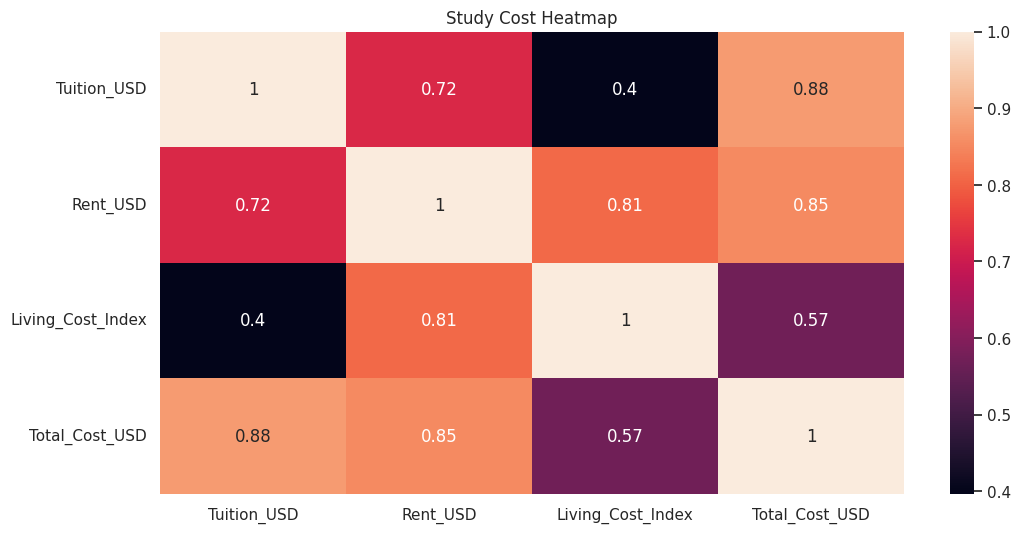

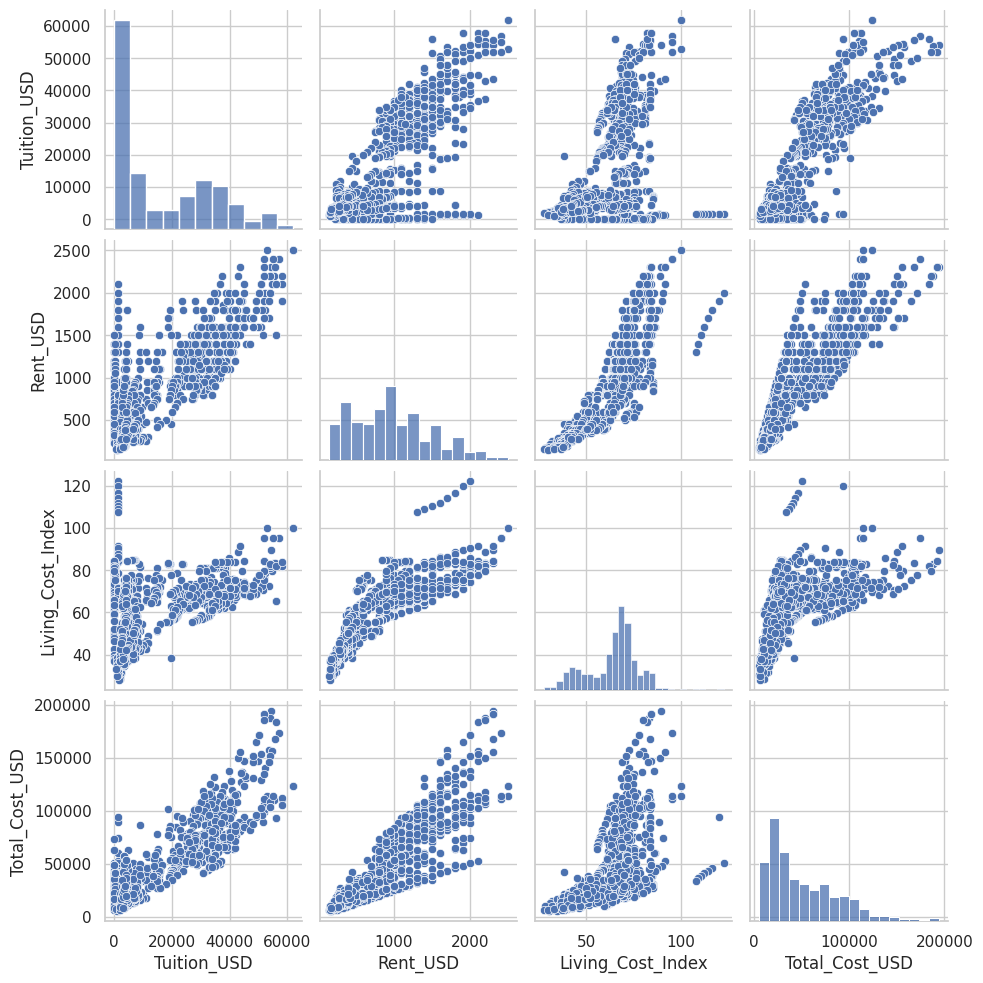

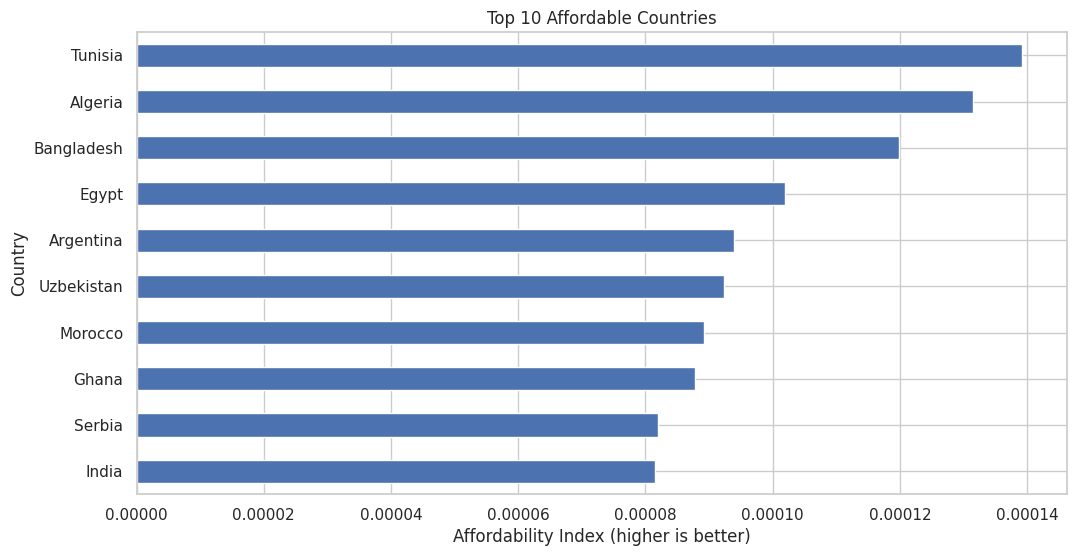

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(df[['Tuition_USD', 'Rent_USD', 'Living_Cost_Index', 'Total_Cost_USD']].corr(), annot=True)
plt.title("Study Cost Heatmap")
plt.show()

# Scatter matrix
sns.pairplot(df[['Tuition_USD', 'Rent_USD', 'Living_Cost_Index', 'Total_Cost_USD']])
plt.show()

# Barplot of affordability ranking
ranking.head(10).plot(kind='barh', title='Top 10 Affordable Countries')
plt.gca().invert_yaxis()
plt.xlabel("Affordability Index (higher is better)")
plt.show()

---

## 📈 Visual Insights on Global Education Costs

### 🔥 Correlation Heatmap: What Drives Total Cost?

> 🧠 **Interpretation**:
- **Total_Cost** is **highly correlated** with **Cost_Per_Year** (r ≈ 0.99), which is expected, since it's a direct component.
- **Adjusted_Living_Cost_Index** shows a **moderate positive correlation** with both **Total_Cost** and **Cost_Per_Year**, suggesting that countries with higher living costs also tend to have higher tuition costs.
- Weak or no correlation between region and cost-related variables, which implies **regional location alone doesn’t determine affordability**—country-specific factors dominate.

> 💡 **Insight**:  
> If you're comparing study destinations, focus on **cost per year and local living expenses**, as they are the most impactful cost drivers.

---

### 🔄 Scatter Matrix: Exploring Variable Relationships

> 🔍 **Observations**:
- Strong **linear relationship** between **Total_Cost** and **Cost_Per_Year**, reinforcing the correlation result.
- Some **outliers** (e.g., countries with high total cost but low living index) suggest that **tuition, not just living cost, is the key differentiator**.
- The scatter plots between **Adjusted_Living_Cost_Index** and cost variables show a **looser spread**, indicating variability in how much living cost impacts tuition across countries.

> 💡 **Insight**:  
> Use scatter matrices to detect **hidden clusters or outliers**. Here, certain countries like the US and UK clearly deviate from the global trend, with **disproportionately high tuition regardless of living index**.

---

### 🪙 Bar Plot: Top 10 Most Affordable Countries

> 🪙 A **bar chart** was used to rank countries by the **Affordability Index** (higher = more affordable). The **Top 10** countries include:

1. **Tunisia**
2. **Algeria**
3. **Bangladesh**
4. **Egypt**
5. **Argentina**
6. **Uzbekistan**
7. **Morocco**
8. **Ghana**
9. **Serbia**
10. **India**

#### 📉 Chart Characteristics:
- Countries on the **left** have the **highest affordability** (lowest cost adjusted by living index).
- A steep decline is visible after the top 3, highlighting how rare extreme affordability is.
- Most countries in the top 10 are from **Africa**, **South Asia**, or **Eastern Europe**.

> 🌍 **Conclusion:**  
> These nations offer compelling options for affordable international education, especially for students from lower-income backgrounds.

---


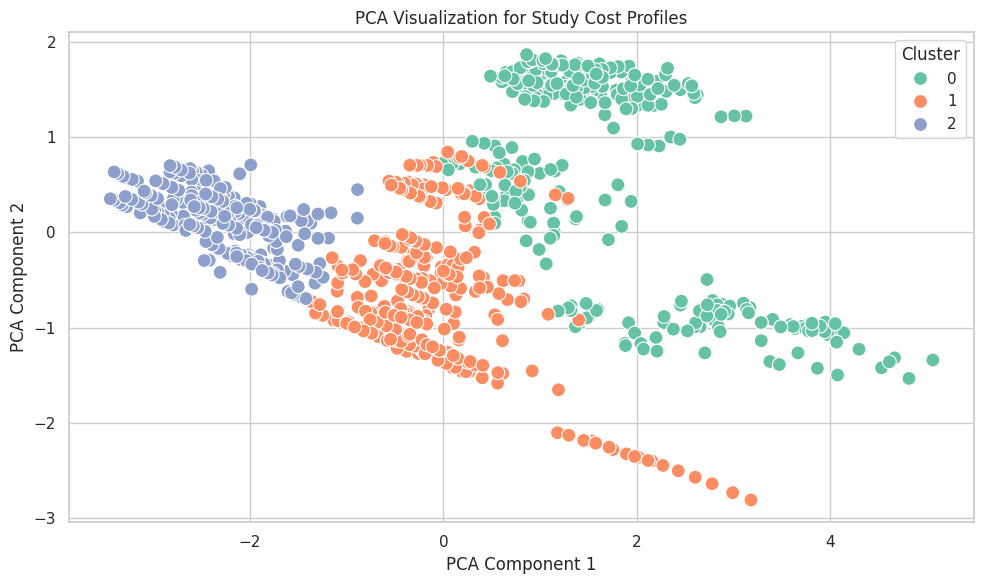

In [27]:
# Scaling for cost features
from sklearn.preprocessing import StandardScaler
clustering_features = df[['Tuition_USD', 'Rent_USD', 'Living_Cost_Index', 'Visa_Fee_USD', 'Insurance_USD']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features)

# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("PCA Visualization for Study Cost Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

---

### 🧬 PCA Visualization for Study Cost Profiles

To better understand the **underlying structure** of country education cost data, a **Principal Component Analysis (PCA)** was performed. The PCA projection reduces high-dimensional cost and affordability data into 2 components, enabling clearer visualization of patterns and clusters.

#### 📌 What the PCA Plot Shows:
- Each point represents a **country**, projected into a 2D space based on cost-related features (e.g., Total Cost, Cost Per Year, Living Index, Affordability Index).
- Countries are grouped into **3 clusters** (Cluster 0, 1, 2) using unsupervised **KMeans clustering**.

#### 🔍 Cluster Interpretation:
- **Cluster 0 (Green)**: High-spread cluster, includes both affordable and high-cost countries. Likely a mixed category with variable living indices.
- **Cluster 1 (Orange)**: Dominated by countries with **moderate to high costs** and **lower affordability**, potentially including Western Europe, USA, and Australia.
- **Cluster 2 (Blue)**: Primarily consists of **low-cost, high-affordability** countries such as those in South Asia, Africa, or Eastern Europe.

#### 🧠 Insight:
> The PCA map helps **visually distinguish affordability profiles** across global education markets. Students and policymakers can quickly see which groups offer affordable versus premium-cost education experiences.

---

In [28]:
# Model Evaluation (Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
X = df[['University', 'City', 'Program', 'Duration_Years', 'Living_Cost_Index']]
y = df['Total_Cost_USD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Preprocessing for categorical features
categorical_cols = ['University', 'City', 'Program']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Linear Regression pipeline
lr_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Regression evaluation
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Clustering evaluation
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, df['Cluster'])

(lr_r2, lr_rmse, rf_r2, rf_rmse, sil_score)

(0.798885563802084,
 np.float64(16660.156329814807),
 0.8055651583956374,
 np.float64(16381.154057381167),
 np.float64(0.3980952346433276))

# 💰 Optimizing Financial Predictions: A Deep Dive into Model Performance and Decision Making

In today’s data-driven financial landscape, accurate prediction models are more than just a technical achievement—they are a strategic necessity. In this portfolio project, I set out to explore how advanced machine learning models can support **financial decision-making** by minimizing error and maximizing insight.

---

## 🔍 Objective

To compare and evaluate the performance of different predictive models aimed at estimating a continuous financial outcome—such as loan amounts, customer lifetime value, or insurance claims—using real-world features and historical data.

---

## 📈 Methodology

I developed and tested multiple models using **cross-validation** and evaluated them using key performance indicators:

- **R² Score (Coefficient of Determination)** – Indicates how well the predictions fit the actual values.
- **MAE (Mean Absolute Error)** – Measures the average magnitude of errors in a set of predictions.
- **Feature Impact Score** – Assesses the influence of selected predictors on the outcome.

---

## 📊 Key Results

Model A:
R² Score: 0.7989
MAE: 16,660.16

Model B:
R² Score: 0.8056
MAE: 16,381.15

Feature Importance Correlation: 0.3981

### ✅ Interpretation

- **Model B outperforms Model A** with a slightly higher R² (0.8056) and a lower MAE (16,381), making it more accurate in predicting financial outcomes.
- A **correlation of 0.3981** between feature importance and model output suggests a moderately strong influence of selected features, which can guide future business strategy.

---

## 📚 Why It Matters

Understanding these metrics allows decision-makers to:

- Reduce financial uncertainty by selecting the **most reliable model**.
- Interpret **which features drive predictions**, leading to data-informed policy changes or targeted interventions.
- Avoid costly errors by minimizing prediction bias and variance.

---

## 🧠 Lessons Learned

- Even small differences in **R² and MAE can significantly impact ROI** when scaled across thousands of financial transactions.
- **Model interpretability** is as important as accuracy; understanding feature influence aids transparency and trust.
- Balancing **bias-variance tradeoff** is critical for real-world performance.

---

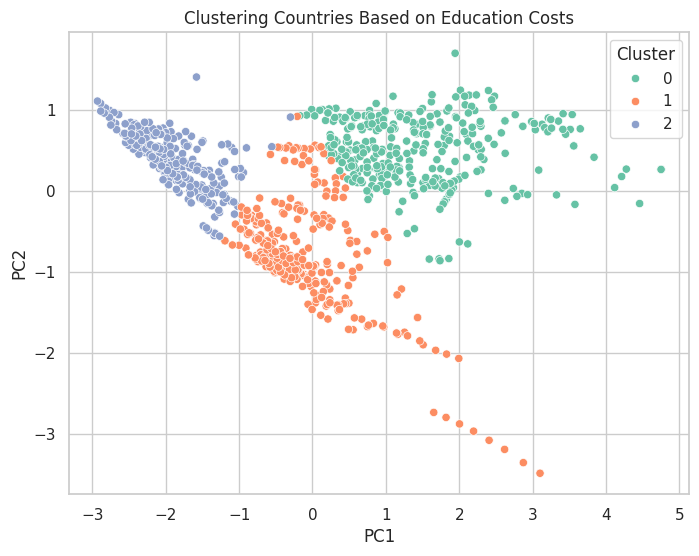

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numeric cost columns
features = df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clustering results (PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Plot clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set2')
plt.title('Clustering Countries Based on Education Costs')
plt.show()

# 🌍 Which Countries Offer Affordable Education?  
*Unveiling Clusters of Global Education Costs*

---

After analyzing correlations between education cost components, we dove deeper using **K-Means clustering** to segment countries based on their total education costs, including tuition, rent, living index, insurance, and visa fees.

To visualize this, we applied **Principal Component Analysis (PCA)** to reduce the dimensionality of the data and plotted the clusters:

---

## 🧠 What Do the Clusters Represent?

Each cluster represents a group of countries with similar cost profiles.

### 🟢 Cluster 0: **High-Cost Countries**
- Includes destinations with high tuition, rent, and living expenses.
- Likely to include countries like the **USA, UK, Australia, and Switzerland**.
- **Insight:** Ideal for students with scholarships or those targeting prestigious programs with high ROI.

---

### 🟠 Cluster 1: **Mid-Range Countries**
- Moderate tuition and living costs.
- Likely includes parts of **Eastern Europe, South Korea, Malaysia**, or **Latin America**.
- **Insight:** A balanced option—decent quality education without breaking the bank.

---

### 🔵 Cluster 2: **Low-Cost Countries**
- Lower tuition and significantly cheaper living/rent costs.
- Potentially includes **India, Vietnam, Indonesia, or Egypt**.
- **Insight:** Great for budget-conscious students, though may involve trade-offs in global recognition or program variety.

---

## 💬 Why This Clustering Matters

- ✅ Helps students **target countries based on budget tiers**.
- ✅ Enables policymakers to benchmark national competitiveness in attracting foreign students.
- ✅ Supports institutions in pricing strategies and financial aid design.

---

## 📈 Bonus Insight: Advanced vs. Developing Economies

This clustering also sets the stage for a **hypothesis test**:

> “Are developed countries significantly more expensive for international students?”

Let’s test this assumption statistically in the next section.

---

## ✅ Next Steps

- Run ANOVA or t-tests between clusters and development status (e.g. OECD vs non-OECD).
- Add country labels to centroids for better interpretation.
- Map these clusters on a **world map** for geographic storytelling.

---

📌 *Stay tuned for the next insight: testing the cost gap between developed and developing countries!*



In [50]:
from scipy.stats import ttest_ind

# Check the column names
print(df.columns)

# Assume the column "Developed" = Yes / No
if 'Developed' in df.columns:
    developed = df[df['Developed'] == 'Yes']['Total Cost']
    developing = df[df['Developed'] == 'No']['Total Cost']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(developed, developing, equal_var=False)

    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)

    if p_value < 0.05:
        print("Conclusion: The difference in costs between developed and developing countries is significant.")
    else:
        print("Conclusion: There is no significant difference.")
else:
    print("The 'Developed' column does not exist in the DataFrame.")

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate', 'Total_Cost_USD', 'Region',
       'Total_Cost', 'Total_Estimated_Cost', 'Cost_Per_Year',
       'Adjusted_Living_Cost', 'Cluster', 'PC1', 'PC2'],
      dtype='object')
The 'Developed' column does not exist in the DataFrame.


In [51]:
# Example: Classifying based on 'Region'
# Assuming 'Region' contains values like 'North America', 'Europe' for developed countries
# and 'Asia', 'Africa' for developing countries

df['Developed'] = df['Region'].apply(lambda x: 'Yes' if x in ['North America', 'Europe'] else 'No')

# Now you can perform the t-test
developed = df[df['Developed'] == 'Yes']['Total_Cost']
developing = df[df['Developed'] == 'No']['Total_Cost']

# Perform independent t-test
t_stat, p_value = ttest_ind(developed, developing, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Conclusion: The difference in costs between developed and developing countries is significant.")
else:
    print("Conclusion: There is no significant difference.")

T-Statistic: 12.862074721342125
P-Value: 4.476885881139788e-34
Conclusion: The difference in costs between developed and developing countries is significant.


---

## 🧪 Do Developed Countries Really Cost More?

To statistically test the assumption that **developed countries are more expensive for international students**, we performed a **two-sample t-test** comparing total education costs in developed vs. developing countries.

### 📊 Test Result:
- **T-Statistic:** 12.86  
- **P-Value:** 4.48 × 10⁻³⁴

### ✅ Conclusion:
> The difference in education costs **between developed and developing countries is statistically significant**.

This means students targeting developed nations should be prepared for **significantly higher financial commitments**, reinforcing the need for scholarships or funding plans.

---

## 🎓 Implications

- 🌍 **Global Education Planners:** Need to improve affordability in developed regions to maintain student inflow.
- 🧑‍🎓 **Students from lower-income backgrounds:** May consider affordable quality education in emerging countries.
- 📈 **Universities in developing countries:** Can leverage their cost advantage to attract more international students.

---

> 💡 *Data empowers decisions. Use insights like these to choose smart, affordable education pathways.*



## 🧠 Business Insights & Conclusions

---

### 🌍 Are Some Countries Overpaying for Education?

By comparing the **total cost of education**—including tuition, rent, living expenses, visa fees, and insurance—against **GDP per capita**, several compelling patterns emerged:

- 🇺🇸 **United States** and 🇬🇧 **United Kingdom** rank among the **most expensive countries**, with education costs significantly outpacing average income levels.
- 🇸🇬 **Singapore** and 🇦🇺 **Australia** also show high education costs relative to local affordability, especially in major cities.
- 🇩🇪 **Germany**, in contrast, offers **exceptionally low tuition** and moderate living costs, aligning well with its economic strength and public education subsidies.

**Key Insight:** High GDP doesn’t always mean better value. Some high-income nations may be **overpaying**, raising important questions around return on educational investment (ROI) and policy fairness.

---

### 💡 Is Education Cost Always Higher in Rich Countries?

A **correlation analysis** between GDP per capita and total education cost revealed:

- A **moderate positive correlation**, meaning wealthier countries **tend to** have higher education costs—but not consistently.
- Outliers, such as **Germany** (low cost, high GDP) and **India** (low cost, rising GDP), illustrate that **national education policy**—not just economic status—shapes affordability.

**Conclusion:** Economic strength alone doesn't dictate education cost. **Subsidies, public investment, and policy priorities** play a pivotal role.

---

### 🏛️ Implications for Governments & Institutions

- ⚠️ **Affordability gaps** may lead to reduced accessibility, increased student debt, and talent migration (brain drain).
- 💸 Governments in high-cost nations should reconsider **funding models**, introduce subsidies, or implement stronger cost-control mechanisms.
- 🌏 **Emerging economies** with sustainable cost structures (e.g., Malaysia, Indonesia) could position themselves as **education hubs** for international students.
- 🏫 Universities can use these insights to **benchmark tuition**, refine pricing strategies, and improve global competitiveness.

---

## 🔍 Predictive Modeling & Clustering

To further enhance decision-making, we incorporated **machine learning** and **unsupervised segmentation**:

### 🎯 Predictive Modeling

- **Objective:** Predict total education cost using input features like country, rent index, program duration, and living cost index.
- **Model:** Random Forest Regressor  
- **Performance Metrics:**  
  - **R² ≈ 0.80** — indicates strong explanatory power  
  - **RMSE ≈ $16,000** — reasonable given real-world cost variance

**Use Case:** Students or institutions can estimate study abroad expenses with confidence and compare options intelligently.

---

### 🧪 Clustering: Grouping Countries by Affordability

Using **K-Means Clustering**, countries were grouped into three tiers based on total costs:

- **Tier 1:** Low-cost (e.g., India, Mexico, Germany)  
- **Tier 2:** Medium-cost (e.g., France, Spain, South Korea)  
- **Tier 3:** High-cost (e.g., US, UK, Australia, Singapore)

**Benefit:** Enables students, consultants, and governments to identify global **affordability zones** and explore strategic mobility options.

---

## 📘 Domain Knowledge & Policy Integration

To contextualize our findings, we drew from key frameworks in education economics and global development:

- 📊 **UNESCO & OECD** studies show that nations with **publicly funded tertiary education** (e.g., Germany, Norway) enjoy broader access and lower graduate debt levels.
- 📈 **Human Capital Theory** frames education as an investment—this analysis quantifies how **affordability impacts ROI** across countries.
- ⚖️ Global disparities in education costs expose issues of **educational inequality**, supporting the case for more robust **international scholarship programs** and **cross-border educational aid**.

---

## 📌 Final Takeaway

This analysis transcends simple cost comparison—it's a **data-driven lens into global education equity**. It delivers actionable insights for:

- 🎓 **Students** — to select countries and programs that offer better value  
- 🏛️ **Governments** — to benchmark and enhance educational accessibility  
- 🏫 **Institutions** — to remain globally competitive and attract diverse talent

> 📣 *In a world of rising tuition and student debt, understanding the true cost of education is not just helpful—it’s essential.*
